#  ML-classification methods to predict the popularity of online news


# Data - Popularity of online news

For this problem, you will use classification tools to predict the popularity of online news based on attributes such as the length of the article, the number of images, the day of the week that the article was published, and some variables related to the content of the article. You can learn details about the datasetat the
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). 
This dataset was first used in the following conference paper: 

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. *Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence* (2015).

The dataset contains variables describing 39,644 articles published between January 7, 2013 and Januyary 7, 2015 on the news website, [Mashable](http://mashable.com/). 
There are 61 variables associated with each article. Of these, 58 are *predictor* variables, 2 are variables that we will not use (url and timedelta), and finally the number of shares of each article. The number of shares is what we will use to define whether or not the article was *popular*, which is what we will try to predict. You should read about the predictor variables in the file *OnlineNewsPopularity.names*. Further details about the collection and processing of the articles can be found in the conference paper. 


#### Import the data and setup

In [17]:
# import and setup 
    
import pandas as pd
import numpy as np

from sklearn import tree, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.preprocessing import scale
#import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')


In [18]:
#import data , drop cols and split to X and y

df=pd.read_csv('OnlineNewsPopularity.csv',sep=',')
df = df.drop(df.columns[[0, 1]],axis=1)#drop not predict var

X=df.iloc[:,:58].values#create X from df (col 0-58)

shares=df.iloc[:,58:].values#create y from df (only shars col)

med=np.median(shares)#find median of shars 
y=np.where(shares >= med, 1, 0)#create bin array according to median


### Exploratory data analysis 

In [3]:
df.iloc[:,58:].describe()
#min=1, max=843300, median=1400

,shares
count,39644.000000
mean,3395.380184
std,11626.950749
min,1.000000
25%,946.000000
50%,1400.000000
75%,2800.000000
max,843300.000000


In [10]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### Classification using k-NN

In [4]:
#first split the date with cv(40% test 60% train )
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,test_size=0.4)

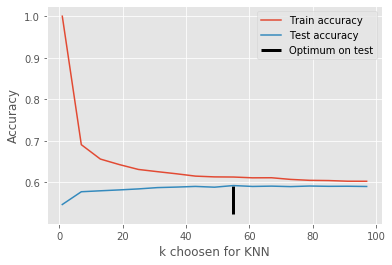

The best accuracy on the test data is: 0.593
when the K is: 55


In [5]:
#KNN
n_neigbors=list(range(1,100,6))#list of odd k's for check
knn_train_score=[]#locate here all trains scores 
knn_test_score=[]#locate here all test acores

def build_knn_model(n_neighbors):
    for k in n_neighbors:#for each k
        knn = KNeighborsClassifier(n_neighbors=k)#model 
        clf_knn = knn.fit(X_train,y_train.ravel())#train
        
        y_pred_train_knn = knn.predict(X_train)#predict on train set
        y_pred_knn = knn.predict(X_test)#predict on test set
        
        #now we will check acc for test and for train with true and pred values
        knn_train_score.append(metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train_knn))
        knn_test_score.append(metrics.accuracy_score(y_true = y_test, y_pred = y_pred_knn))
       
build_knn_model(n_neigbors)#build lists off scores from model

optimal_sco_test = np.argmax(knn_test_score)#check what is the best score on test
optimal_k= n_neigbors[optimal_sco_test]#what is the k 

#now we will print best test accuracy and k choosen for that accuracy
print("The best accuracy on the test data is:",round(np.max(knn_test_score),3))
print("when the K is:",optimal_k)

#plot the scores and optimal k on test
plt.plot(n_neigbors,knn_train_score,label='Train accuracy')#line for train
plt.plot(n_neigbors, knn_test_score, label='Test accuracy')#line for test
plt.vlines(optimal_k, plt.ylim()[0], np.max(knn_test_score), color='k',linewidth=3, label='Optimum on test')#line to show best k
plt.xlabel('k choosen for KNN')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()


### Classification using decision trees 

Accuracy on training data :  0.6486588749684689
Accuracy on test data :  0.6461722789759112
criterion: gini 
max_depth: 5 
min_samples_split: 500


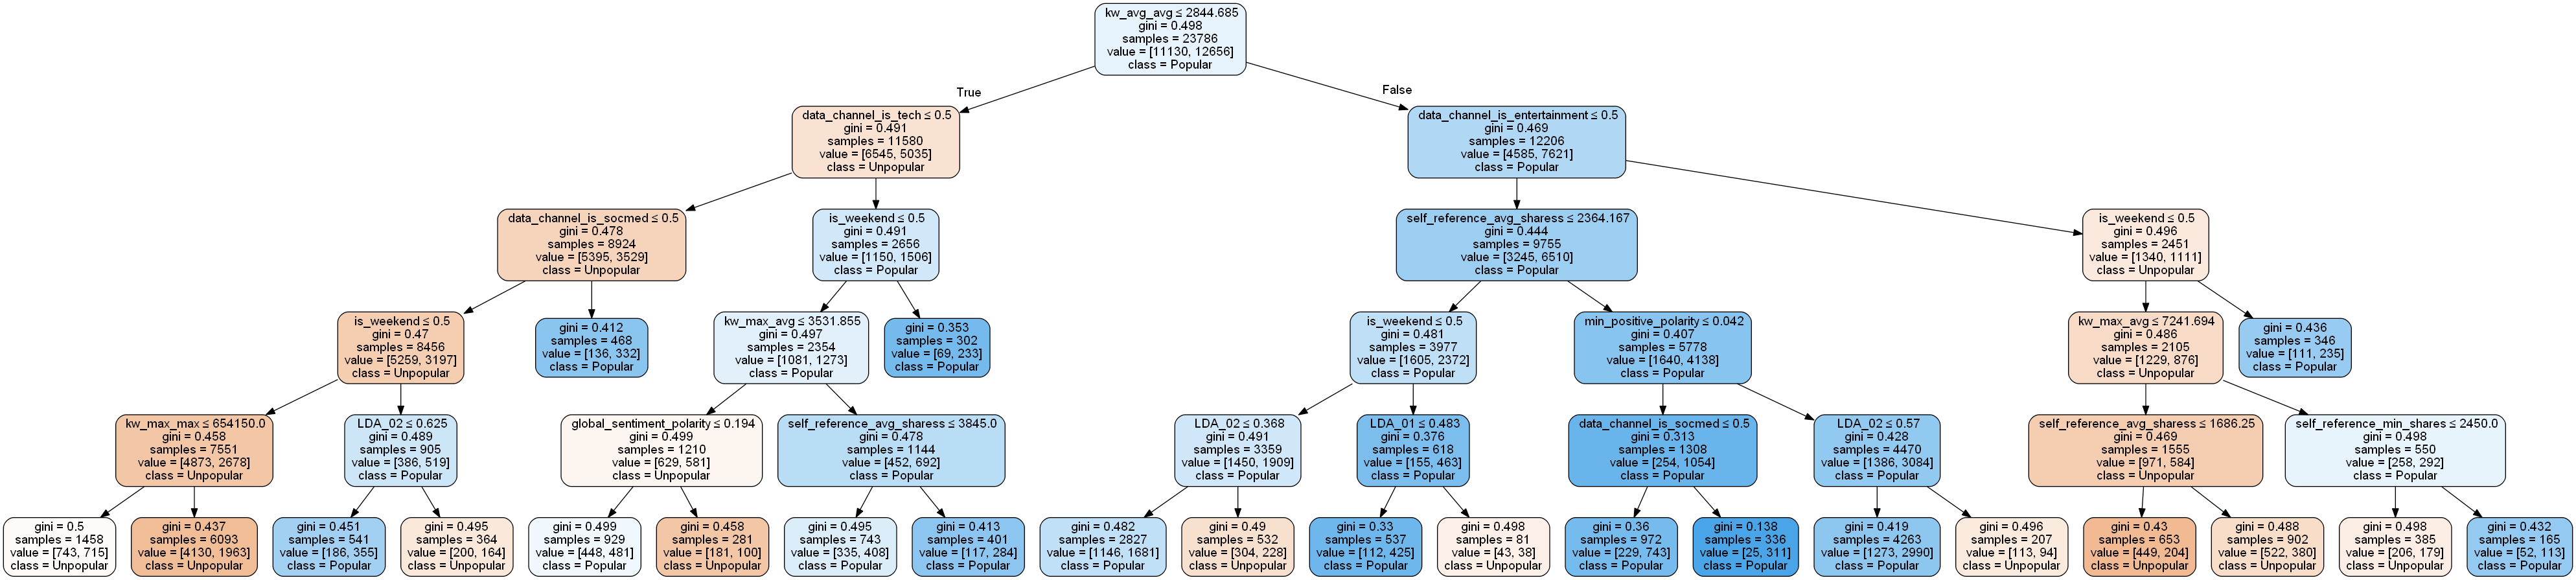

In [6]:
#desicion tree
from IPython.display import Image, display #for the plot 
import pydotplus 
from scipy import misc
from sklearn.model_selection import GridSearchCV#for searching the best parameters

#save featurs names for the plot
feat_names=list(df.iloc[:,:58].columns)

#render and plot the tree with the best parameters
def renderTree(tree_df,feat_name):
    filename = "PopularityTree.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(tree_df, 
                                 out_file=f, 
                                 feature_names=feat_name, 
                                 class_names=["Unpopular", "Popular"],  
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True)
  
    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()
    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "PopularityTree.png"
    graph.write_png(image_name)  
    display(Image(filename=image_name))
    
depths=list(range(1,6))#list of depths for check from 1-6 
min_samples=list(range(500,15000,1000))#list of samples for check from 10% to 100% 
    
#first we create a dic for all the estimators we want to check
param_grid = { 'criterion':['gini','entropy'],'max_depth':depths,'min_samples_split':min_samples}
dfTree=DecisionTreeClassifier()# decision tree model
dftree_gscv = GridSearchCV(dfTree, param_grid, cv=5)#use gridsearch to test all values with 5 folds
dftree_gscv.fit(X, y)
    
best_grid_par=dftree_gscv.best_params_#save grid parameters to var 
y_dt_pred_train=dftree_gscv.predict(X_train)
y_dt_pred_test=dftree_gscv.predict(X_test)

#print the accuracy of the model and parameters after gridseach
print('Accuracy on training data : ',metrics.accuracy_score(y_true=y_train,y_pred=y_dt_pred_train)) 
print('Accuracy on test data : ',metrics.accuracy_score(y_true=y_test,y_pred=y_dt_pred_test))
print('criterion:',best_grid_par['criterion'],
      '\nmax_depth:',best_grid_par['max_depth'],
      '\nmin_samples_split:',best_grid_par['min_samples_split']
     )

#now we will create a tree with the best parameters, fit him and render for plot
best_tree=tree.DecisionTreeClassifier(max_depth=best_grid_par['max_depth'],min_samples_split=best_grid_par['min_samples_split'])
best_tree=best_tree.fit(X_train,y_train)
renderTree(best_tree,feat_names)         
            

### Classification using NB

In [23]:
#check the nb with GaussianNB and BernoulliNB (there is negative values on X so not with MultinomialNB )
gnb_df = BernoulliNB()
gnb_df.fit(X_train,y_train.ravel())
y_gnb_pred_train = gnb_df.predict(X_train)
y_gnb_pred_test = gnb_df.predict(X_test)

# Print results
print('GaussianNB-')
print('Accuracy on Train data:', metrics.accuracy_score(y_true = y_train, y_pred = y_gnb_pred_train))
print('Accuracy on test data:', metrics.accuracy_score(y_true = y_test, y_pred = y_gnb_pred_test))

print()

bnb_df = BernoulliNB()
bnb_df.fit(X_train,y_train.ravel())
y_bnb_pred_train = gnb_df.predict(X_train)
y_bnb_pred_test = gnb_df.predict(X_test)

# Print results
print('BernoulliNB-')
print('Accuracy on Train data:', metrics.accuracy_score(y_true = y_train, y_pred = y_bnb_pred_train))
print('Accuracy on test data:', metrics.accuracy_score(y_true = y_test, y_pred = y_bnb_pred_test))


GaussianNB-
Accuracy on Train data: 0.614983603800555
Accuracy on test data: 0.6151469289948291

BernoulliNB-
Accuracy on Train data: 0.614983603800555
Accuracy on test data: 0.6151469289948291


**Insight:** 
<br>
1. the method the worked the best according to accuracy is the desicion tree with 64% , if we looking on other parameters, NB worked much faster then other and he is the easiest to implementaion with 61%
+ **on knn:** the optimal k is 55 , the lower k we taking we get overfitting and higher than that underfitting <br> **on DT:** its seems that after gridsearch the lower split that we take improve the auc(i took 500 for the visuality) and the best depth is 5 .
+  the easiest do interpret model is with decision tree hence to the visuality of the most influence featurs(root) and due to the condition on each node that show us what lead to popularity news.
+ **interpretion:**<br>
    1)the kw_avg_avg(Avg. keyword (avg. shares)) is the dominant factor 
    <br>
    2)for keyword avg less then 2844 and topic is Entertainment the new's almost sure to be popular
    <br>
    3)for keyword avg less then 2844 if the topic is Entertainment its most likely to be unpopular if its published on   weekend
    <br>
    4)for keyword avg higher then 2844 if the topic is tech its most likely to be popular if its published on weekend
    <br>
    5)if keyword avg higher then 2844 and the topic is social-media and the news published on weekend most likely that its unpopular
    <br>
    6)to sum up, the to raise the odds to be popular , you need less keywords, best topic is entertainment but not on weekends, and to share a lot of refrences to the article. 